In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [109]:
bike_df = pd.read_csv('bikeshare.csv')

In [110]:
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [111]:
bike_df.shape

(730, 16)

In [112]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [113]:
num_var = bike_df[['cnt', 'temp','atemp', 'hum', 'windspeed', 'weathersit']]

In [114]:
num_var.head()

,cnt,temp,atemp,hum,windspeed,weathersit
0,985,14.110847,18.18125,80.5833,10.749882,2
1,801,14.902598,17.68695,69.6087,16.652113,2
2,1349,8.050924,9.47025,43.7273,16.636703,1
3,1562,8.200000,10.60610,59.0435,10.739832,1
4,1600,9.305237,11.46350,43.6957,12.522300,1


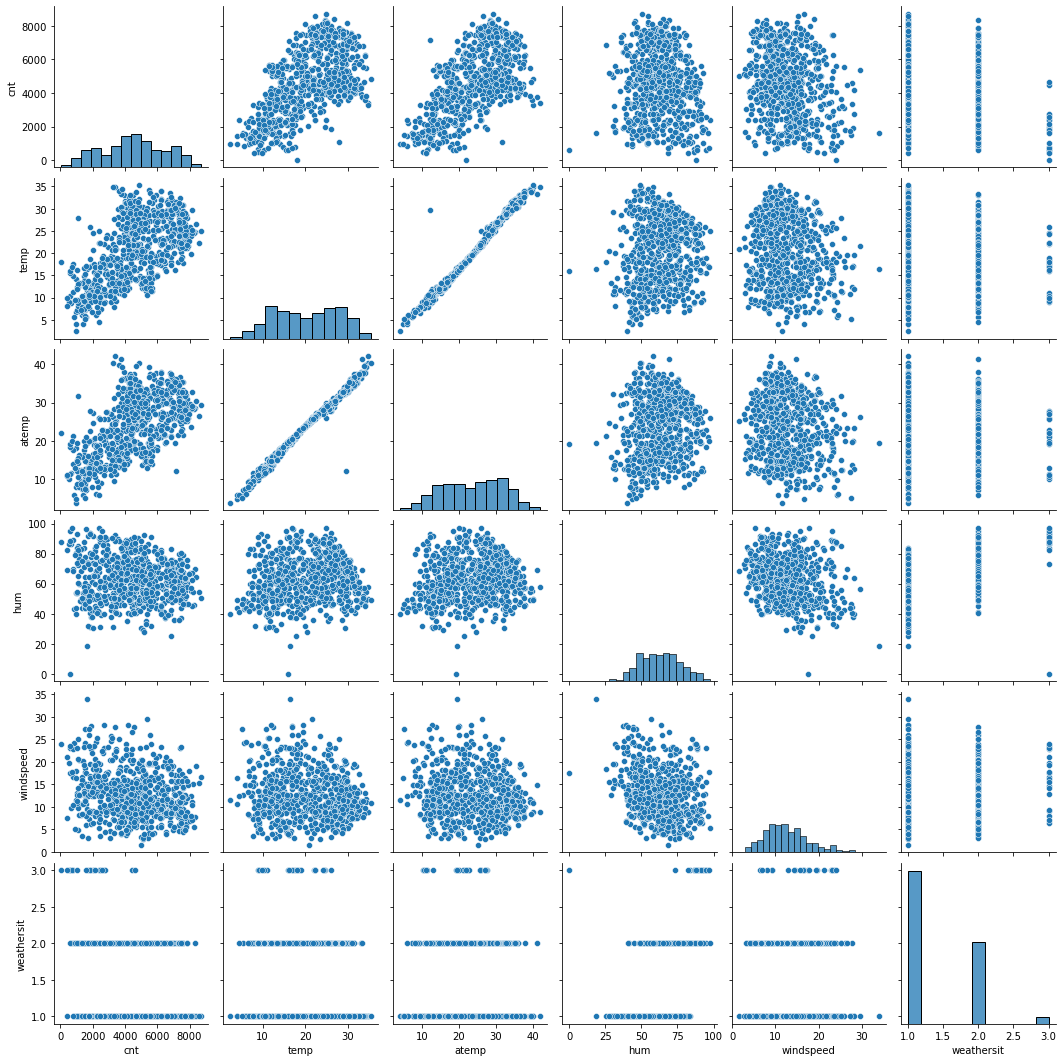

In [115]:
# visualizing numeric variables
sns.pairplot(num_var)

### Observations:

We can say that few variables are correlated so, we can consider linear regression.
<br>eg: <br><t>a. As temp increases, demand increases<br>
   <t> b. as windspeed is in range 10-15 most people tend to rent bike.
    <br><t> c. for weather situation 1,2 demand is high.

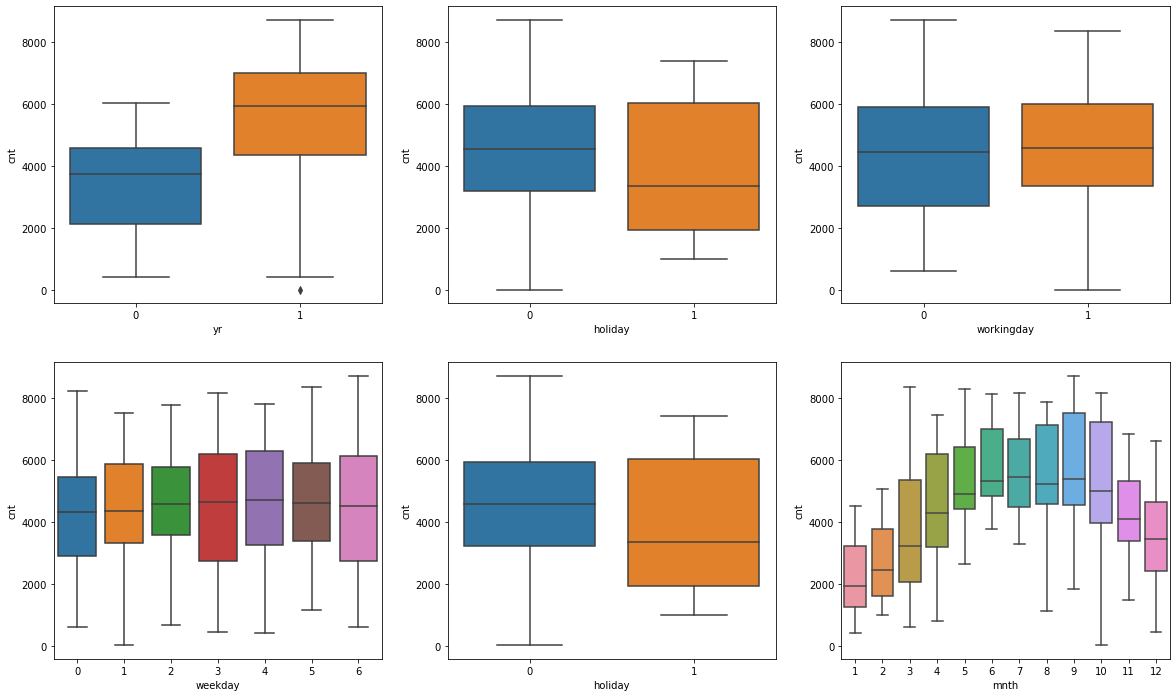

In [116]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='yr',y='cnt',data=bike_df)
plt.subplot(2,3,2)
sns.boxplot(x='holiday',y='cnt',data=bike_df)
plt.subplot(2,3,3)
sns.boxplot(x='workingday',y='cnt',data=bike_df)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_df)
plt.subplot(2,3,5)
sns.boxplot(x='holiday',y='cnt',data=bike_df)
plt.subplot(2,3,6)
sns.boxplot(x='mnth',y='cnt',data=bike_df)
plt.show()

### Drop unneccessary rows
1. dteday
2. casual
3. registered

In [117]:
bike_df = bike_df.drop(['instant','dteday','casual','registered'],axis=1)

### Train and test data split

In [118]:
bike_train, bike_test = train_test_split(bike_df, train_size=0.7, random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 12)
(220, 12)


In [119]:
scaler = MinMaxScaler()

In [120]:
#create a list of numeric variables
num_vars = ['cnt','windspeed','hum','temp','atemp']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
576,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475,0.482973
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981,0.191095


In [121]:
bike_train[num_vars].describe()

,cnt,windspeed,hum,temp,atemp
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.320883,0.650480,0.537440,0.513156
std,0.224421,0.169803,0.145846,0.225858,0.212410
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.199179,0.538643,0.339853,0.332086
50%,0.518638,0.296763,0.653714,0.542596,0.529718
75%,0.684710,0.414447,0.754830,0.735215,0.688457
max,1.000000,1.000000,1.000000,1.000000,1.000000


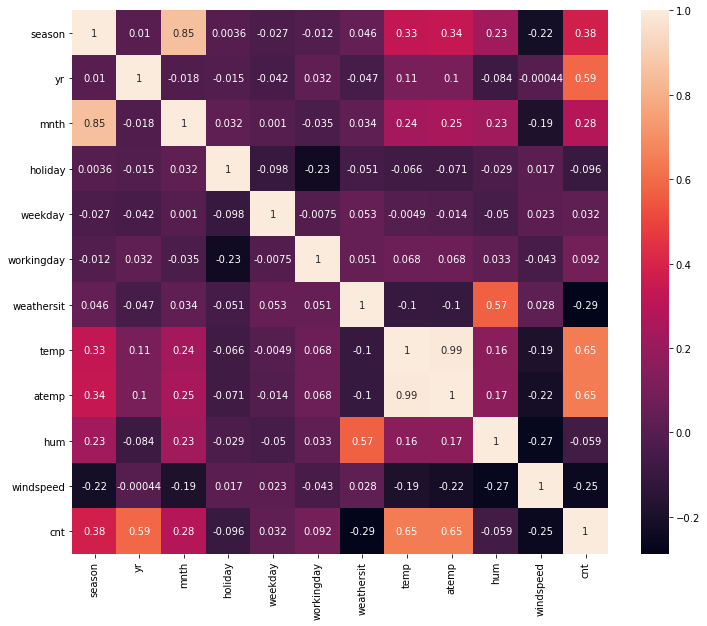

In [122]:
#Heat Map
plt.figure(figsize=(12,10))
sns.heatmap(bike_train.corr(),annot=True)
plt.show()

In [123]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [124]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
576,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686
426,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342
728,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106
482,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981


In [125]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [126]:
#adding constant
X_train_sm = sm.add_constant(X_train)

#creating first model and fit
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

lr_model.params

const         0.215273
season        0.046957
yr            0.234869
mnth         -0.001415
holiday      -0.068619
weekday       0.007890
workingday    0.019408
weathersit   -0.079035
temp          0.213584
atemp         0.282840
hum          -0.097216
windspeed    -0.157488
dtype: float64

Coefficient is positive which means if the actual temp goes up demand should go up 

In [127]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     185.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.86e-168
Time:                        00:04:37   Log-Likelihood:                 454.40
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     498   BIC:                            -834.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2153      0.030      7.167      0.000       0.156       0.274
season         0.0470      0.008      5.901      0.000       0.031       0.063
yr             0.2349      0.009     26.035      0.000       0.217       0.253
mnth          -0.0014      0.002     -0.570      0.569      -0.006       0.003
holiday       -0.0686      0.029     -2.341      0.020      -0.126      -0.011
weekday        0.0079      0.002      3.516      0.000       0.003       0.012
workingday     0.0194      0.010      1.974      0.049    9.27e-05       0.039
weathersit    -0.0790      0.010     -7.530      0.000      -0.100      -0.058
temp           0.2136      0.140      1.531      0.127      -0.061       0.488
atemp          0.2828      0.150      1.889      0.059      -0.011       0.577
hum           -0.0972      0.042     -2.341      0.020      -0.179      -0.016
windspeed     -0.1575      0.029     -5.477      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.779   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.597
Skew:                          -0.662   Prob(JB):                     6.58e-32
Kurtosis:                       5.237   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
8,atemp,345.57
7,temp,332.66
9,hum,24.93
0,season,23.68
2,mnth,17.07
6,weathersit,12.57
10,windspeed,3.79
5,workingday,3.14
4,weekday,3.04
1,yr,2.01


In [166]:
X = X_train.drop('mnth',axis=1)

In [167]:
#Build another model after dropping the high P value variable
X_train_sm = sm.add_constant(X)

#creating first model and fit
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.29e-169
Time:                        00:06:07   Log-Likelihood:                 454.24
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     499   BIC:                            -839.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2160      0.030      7.202      0.000       0.157       0.275
season         0.0432      0.004      9.880      0.000       0.035       0.052
yr             0.2350      0.009     26.082      0.000       0.217       0.253
holiday       -0.0694      0.029     -2.371      0.018      -0.127      -0.012
weekday        0.0078      0.002      3.490      0.001       0.003       0.012
workingday     0.0196      0.010      1.991      0.047       0.000       0.039
weathersit    -0.0786      0.010     -7.514      0.000      -0.099      -0.058
temp           0.2144      0.139      1.538      0.125      -0.060       0.488
atemp          0.2832      0.150      1.892      0.059      -0.011       0.577
hum           -0.0997      0.041     -2.417      0.016      -0.181      -0.019
windspeed     -0.1577      0.029     -5.489      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.112   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.702
Skew:                          -0.656   Prob(JB):                     1.70e-31
Kurtosis:                       5.224   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
7,atemp,345.55
6,temp,332.64
8,hum,24.68
5,weathersit,12.50
0,season,7.02
9,windspeed,3.79
4,workingday,3.13
3,weekday,3.03
1,yr,2.01
2,holiday,1.09


In [169]:
#temp and atemp has highest correlation so will drop atemp
X = X.drop('atemp',axis=1)

In [170]:
#Build another model after dropping the high P value variable
X_train_sm = sm.add_constant(X)

#creating first model and fit
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.6
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          8.77e-170
Time:                        00:06:13   Log-Likelihood:                 452.41
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     500   BIC:                            -842.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2220      0.030      7.423      0.000       0.163       0.281
season         0.0435      0.004      9.945      0.000       0.035       0.052
yr             0.2350      0.009     26.008      0.000       0.217       0.253
holiday       -0.0719      0.029     -2.452      0.015      -0.129      -0.014
weekday        0.0076      0.002      3.380      0.001       0.003       0.012
workingday     0.0194      0.010      1.972      0.049    7.29e-05       0.039
weathersit    -0.0798      0.010     -7.626      0.000      -0.100      -0.059
temp           0.4751      0.022     21.791      0.000       0.432       0.518
hum           -0.0937      0.041     -2.271      0.024      -0.175      -0.013
windspeed     -0.1669      0.028     -5.877      0.000      -0.223      -0.111
==============================================================================
Omnibus:                       55.179   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.704
Skew:                          -0.595   Prob(JB):                     2.27e-27
Kurtosis:                       5.087   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
7,hum,23.92
5,weathersit,12.44
6,temp,7.77
0,season,7.00
8,windspeed,3.72
4,workingday,3.13
3,weekday,3.03
1,yr,2.01
2,holiday,1.08


In [172]:
X = X.drop('workingday',axis=1)

In [173]:
#Build another model after dropping the high P value variable
X_train_sm = sm.add_constant(X)

#creating first model and fit
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     251.9
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.69e-170
Time:                        00:06:21   Log-Likelihood:                 450.44
No. Observations:                 510   AIC:                            -882.9
Df Residuals:                     501   BIC:                            -844.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2352      0.029      8.052      0.000       0.178       0.293
season         0.0432      0.004      9.847      0.000       0.035       0.052
yr             0.2353      0.009     25.982      0.000       0.218       0.253
holiday       -0.0851      0.029     -2.972      0.003      -0.141      -0.029
weekday        0.0074      0.002      3.305      0.001       0.003       0.012
weathersit    -0.0787      0.010     -7.512      0.000      -0.099      -0.058
temp           0.4778      0.022     21.893      0.000       0.435       0.521
hum           -0.0951      0.041     -2.299      0.022      -0.176      -0.014
windspeed     -0.1691      0.028     -5.944      0.000      -0.225      -0.113
==============================================================================
Omnibus:                       60.526   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.778
Skew:                          -0.669   Prob(JB):                     2.95e-28
Kurtosis:                       5.044   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
6,hum,23.34
4,weathersit,12.42
5,temp,7.67
0,season,7.00
7,windspeed,3.68
3,weekday,3.03
1,yr,2.00
2,holiday,1.04


In [175]:
X = X.drop('hum',axis=1)

In [176]:
#Build another model after dropping the high P value variable
X_train_sm = sm.add_constant(X)

#creating first model and fit
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     284.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.90e-170
Time:                        00:06:32   Log-Likelihood:                 447.76
No. Observations:                 510   AIC:                            -879.5
Df Residuals:                     502   BIC:                            -845.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1935      0.023      8.419      0.000       0.148       0.239
season         0.0419      0.004      9.591      0.000       0.033       0.050
yr             0.2375      0.009     26.239      0.000       0.220       0.255
holiday       -0.0855      0.029     -2.976      0.003      -0.142      -0.029
weekday        0.0079      0.002      3.537      0.000       0.004       0.012
weathersit    -0.0935      0.008    -11.260      0.000      -0.110      -0.077
temp           0.4689      0.022     21.738      0.000       0.427       0.511
windspeed     -0.1502      0.027     -5.491      0.000      -0.204      -0.096
==============================================================================
Omnibus:                       59.411   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.908
Skew:                          -0.665   Prob(JB):                     3.37e-27
Kurtosis:                       4.992   Cond. No.                         33.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
5,temp,6.32
0,season,6.26
4,weathersit,5.75
6,windspeed,3.66
3,weekday,3.00
1,yr,2.00
2,holiday,1.03


In [178]:
X = X.drop('season',axis=1)

In [179]:
#Build another model after dropping the high P value variable
X_train_sm = sm.add_constant(X)

#creating first model and fit
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.31e-153
Time:                        00:06:37   Log-Likelihood:                 404.85
No. Observations:                 510   AIC:                            -795.7
Df Residuals:                     503   BIC:                            -766.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2711      0.023     11.596      0.000       0.225       0.317
yr             0.2356      0.010     23.963      0.000       0.216       0.255
holiday       -0.0771      0.031     -2.469      0.014      -0.138      -0.016
weekday        0.0074      0.002      3.031      0.003       0.003       0.012
weathersit    -0.0864      0.009     -9.617      0.000      -0.104      -0.069
temp           0.5329      0.022     23.911      0.000       0.489       0.577
windspeed     -0.1945      0.029     -6.640      0.000      -0.252      -0.137
==============================================================================
Omnibus:                       16.094   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.669
Skew:                          -0.377   Prob(JB):                     0.000146
Kurtosis:                       3.513   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,weathersit,5.11
4,temp,4.38
5,windspeed,3.66
2,weekday,2.98
0,yr,1.99
1,holiday,1.03


In [181]:
X = X.drop('weekday',axis=1)

In [182]:
#Build another model after dropping the high P value variable
X_train_sm = sm.add_constant(X)

#creating first model and fit
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     315.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.66e-152
Time:                        00:06:44   Log-Likelihood:                 400.24
No. Observations:                 510   AIC:                            -788.5
Df Residuals:                     504   BIC:                            -763.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2915      0.023     12.919      0.000       0.247       0.336
yr             0.2344      0.010     23.667      0.000       0.215       0.254
holiday       -0.0862      0.031     -2.752      0.006      -0.148      -0.025
weathersit    -0.0852      0.009     -9.412      0.000      -0.103      -0.067
temp           0.5331      0.022     23.726      0.000       0.489       0.577
windspeed     -0.1923      0.030     -6.516      0.000      -0.250      -0.134
==============================================================================
Omnibus:                       13.216   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.425
Skew:                          -0.299   Prob(JB):                     0.000447
Kurtosis:                       3.606   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,weathersit,4.73
3,temp,4.13
4,windspeed,3.52
0,yr,1.99
1,holiday,1.02


### Residual Analysis

In [184]:
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

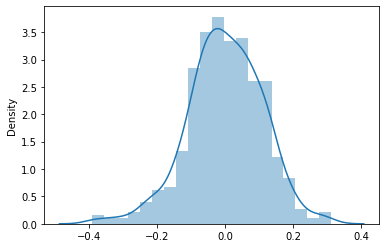

In [185]:
res = y_train - y_train_pred
sns.distplot(res)

In [186]:
#create a list of numeric variables
num_vars = ['cnt','hum','windspeed','atemp','temp']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
184,3,0,7,1,1,0,2,0.678366,0.937470,1.955914,0.056255,0.692706
535,2,1,6,0,3,1,1,0.738463,1.021894,1.808848,0.078579,0.712034
299,4,0,10,0,4,1,2,0.402100,0.620835,2.517430,0.136540,0.303382
221,3,0,8,0,3,1,1,0.721421,0.967202,1.270063,0.138263,0.547400
152,2,0,6,0,4,1,1,0.665808,0.904837,0.887696,0.201802,0.569029


In [187]:
bike_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.463636,0.481818,6.490909,0.036364,3.013636,0.700000,1.372727,0.442487,0.663323,1.896308,0.129824,0.522154
std,1.111807,0.500809,3.422316,0.187620,1.985057,0.459303,0.538204,0.201432,0.251674,0.462995,0.051252,0.219163
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000103,0.076514,0.724590,0.015460,0.048205
25%,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.266882,0.445711,1.556837,0.093068,0.378595
50%,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.442015,0.676989,1.856980,0.125596,0.524678
75%,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.612887,0.872233,2.225046,0.158544,0.677750
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.810220,1.182051,3.029478,0.288534,0.963300


In [188]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [189]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
184,1.0,3,0,7,1,1,0,2,0.678366,0.937470,1.955914,0.056255
535,1.0,2,1,6,0,3,1,1,0.738463,1.021894,1.808848,0.078579
299,1.0,4,0,10,0,4,1,2,0.402100,0.620835,2.517430,0.136540
221,1.0,3,0,8,0,3,1,1,0.721421,0.967202,1.270063,0.138263
152,1.0,2,0,6,0,4,1,1,0.665808,0.904837,0.887696,0.201802


In [190]:
X_test_sm = X_test_sm.drop(['mnth','weekday','workingday','season','weekday','workingday','hum','atemp'], axis = 1)


In [191]:
X_test_sm.head()

,const,yr,holiday,weathersit,temp,windspeed
184,1.0,0,1,2,0.678366,0.056255
535,1.0,1,0,1,0.738463,0.078579
299,1.0,0,0,2,0.402100,0.136540
221,1.0,0,0,1,0.721421,0.138263
152,1.0,0,0,1,0.665808,0.201802


In [192]:
y_test_pred = lr_model.predict(X_test_sm)

In [193]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.6863698748666357

### Best Fitted line equation is:
### cnt = 0.2915 + 0.2344 * yr + 0.5331 * temp - 0.0862 * holiday - 0.0852 * weathersit - 0.1923 * windspeed